In [1]:
%matplotlib notebook

import matplotlib
import pickle,os
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import gridspec

from scipy.stats import pearsonr 

In [2]:
import numpy as np

cut=120
Ae = np.loadtxt('EXP_anatase.dat', unpack=True)      ;Ae=Ae[1][0:cut]  
Af = np.loadtxt('FEFF_anatase.dat', unpack=True)     ;Af=Af[1][0:cut]  
Ax = np.loadtxt('EXCITING_anatase.dat', unpack=True) ;Ax=Ax[1][0:cut]  
Ao = np.loadtxt('OCEAN_anatase.dat', unpack=True)    ;Ao=Ao[1][0:cut] 
E  = np.loadtxt('EXP_anatase.dat', unpack=True)      ;E=E[0][0:cut]
M = np.column_stack( (Ae,Af,Ao,Ax) )

<IPython.core.display.Javascript object>


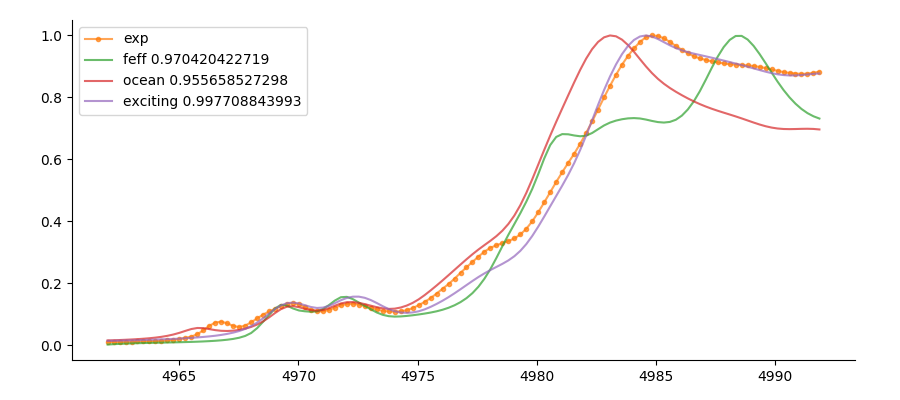

In [3]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.1, left=0.08, right=0.95, wspace=0.05, hspace=0.07)

ax = fig.add_subplot(gs[0])

ax.plot(E,M[:,0], 'C1o-', ms=3, alpha=0.7,label='exp')
ax.plot(E,M[:,1], 'C2-',  ms=3, alpha=0.7,label='feff '+str(pearsonr(M[:,0],M[:,1])[0]))
ax.plot(E,M[:,2], 'C3-',  ms=3, alpha=0.7,label='ocean '+str(pearsonr(M[:,0],M[:,2])[0]))
ax.plot(E,M[:,3], 'C4-',  ms=3, alpha=0.7,label='exciting '+str(pearsonr(M[:,0],M[:,3])[0]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc='best',fontsize=10,ncol=1)


In [12]:
from sklearn.preprocessing import StandardScaler
# M matrix
M = np.column_stack( (Ae,Af,Ao,Ax) )
scaler = StandardScaler()
scaler.fit(M)
M_s = scaler.transform(M)
print(scaler.mean_)
print(scaler.var_)

'''remember MPNN paper. "...Al targets were normalized to have mean 0 and variance 1...''' 
print(np.mean(M_s[:,0]))
print(np.var(M_s[:,0]))

[ 0.41440121  0.37788528  0.40506676  0.40451575]
[ 0.13671239  0.11882888  0.11676614  0.14035035]
0.0
1.0


<IPython.core.display.Javascript object>


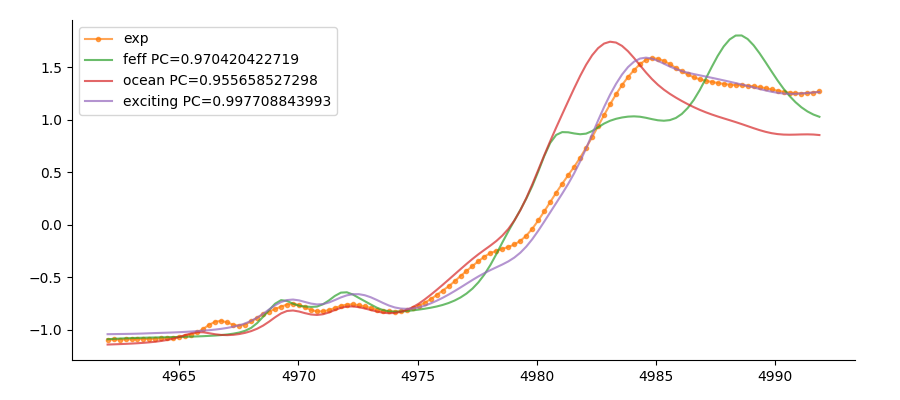

In [7]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.1, left=0.08, right=0.95, wspace=0.05, hspace=0.07)

ax = fig.add_subplot(gs[0])

ax.plot(E,M_s[:,0], 'C1o-', ms=3, alpha=0.7,label='exp')
ax.plot(E,M_s[:,1], 'C2-',  ms=3, alpha=0.7,label='feff PC='+str(pearsonr(M_s[:,0],M_s[:,1])[0]))
ax.plot(E,M_s[:,2], 'C3-',  ms=3, alpha=0.7,label='ocean PC='+str(pearsonr(M_s[:,0],M_s[:,2])[0]))
ax.plot(E,M_s[:,3], 'C4-',  ms=3, alpha=0.7,label='exciting PC='+str(pearsonr(M_s[:,0],M_s[:,3])[0]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc='best',fontsize=10,ncol=1)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>


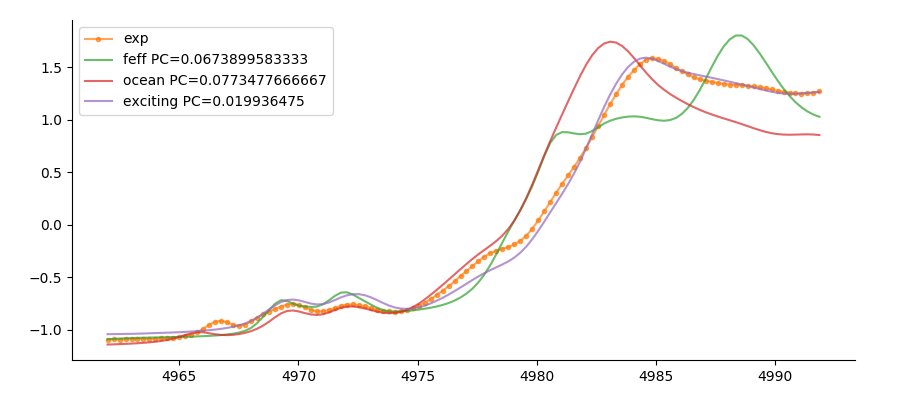

In [17]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.1, left=0.08, right=0.95, wspace=0.05, hspace=0.07)

ax = fig.add_subplot(gs[0])

ax.plot(E,M_s[:,0], 'C1o-', ms=3, alpha=0.7,label='exp')
ax.plot(E,M_s[:,1], 'C2-',  ms=3, alpha=0.7,label='feff PC='+str(mean_absolute_error(M[:,0], M[:,1])))
ax.plot(E,M_s[:,2], 'C3-',  ms=3, alpha=0.7,label='ocean PC='+str(mean_absolute_error(M[:,0], M[:,2])))
ax.plot(E,M_s[:,3], 'C4-',  ms=3, alpha=0.7,label='exciting PC='+str(mean_absolute_error(M[:,0], M[:,3])))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc='best',fontsize=10,ncol=1)

<IPython.core.display.Javascript object>


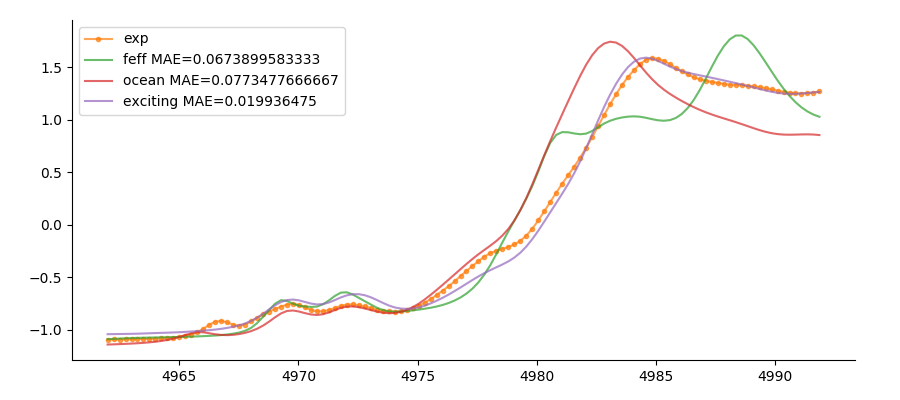

In [18]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.1, left=0.08, right=0.95, wspace=0.05, hspace=0.07)

ax = fig.add_subplot(gs[0])

ax.plot(E,M_s[:,0], 'C1o-', ms=3, alpha=0.7,label='exp')
ax.plot(E,M_s[:,1], 'C2-',  ms=3, alpha=0.7,label='feff MAE='+str(mean_absolute_error(M[:,0], M[:,1])))
ax.plot(E,M_s[:,2], 'C3-',  ms=3, alpha=0.7,label='ocean MAE='+str(mean_absolute_error(M[:,0], M[:,2])))
ax.plot(E,M_s[:,3], 'C4-',  ms=3, alpha=0.7,label='exciting MAE='+str(mean_absolute_error(M[:,0], M[:,3])))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc='best',fontsize=10,ncol=1)

<IPython.core.display.Javascript object>


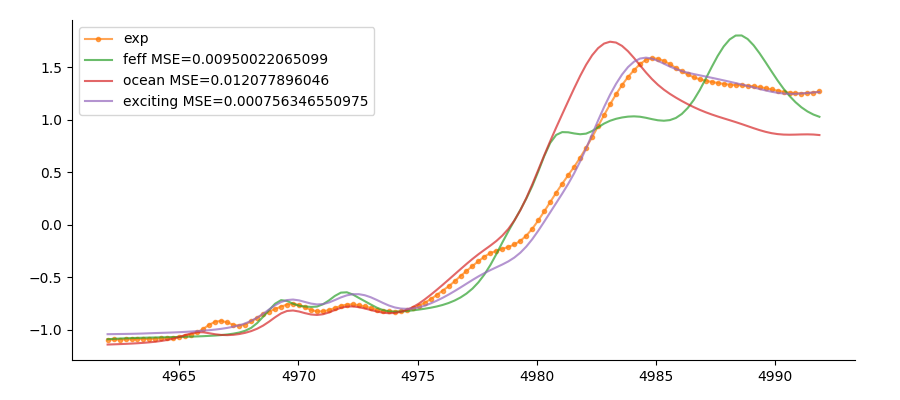

In [19]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.1, left=0.08, right=0.95, wspace=0.05, hspace=0.07)

ax = fig.add_subplot(gs[0])

ax.plot(E,M_s[:,0], 'C1o-', ms=3, alpha=0.7,label='exp')
ax.plot(E,M_s[:,1], 'C2-',  ms=3, alpha=0.7,label='feff MSE='+str(mean_squared_error(M[:,0], M[:,1])))
ax.plot(E,M_s[:,2], 'C3-',  ms=3, alpha=0.7,label='ocean MSE='+str(mean_squared_error(M[:,0], M[:,2])))
ax.plot(E,M_s[:,3], 'C4-',  ms=3, alpha=0.7,label='exciting MSE='+str(mean_squared_error(M[:,0], M[:,3])))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc='best',fontsize=10,ncol=1)